# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [1]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [2]:
# %matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


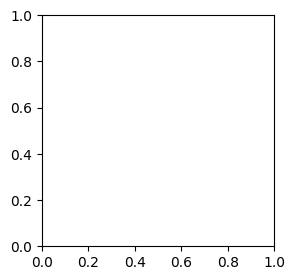

In [3]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

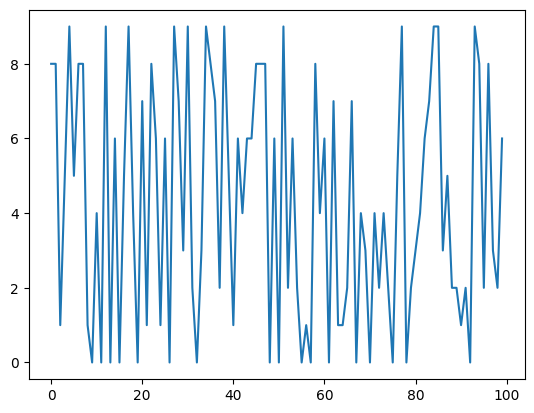

In [4]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

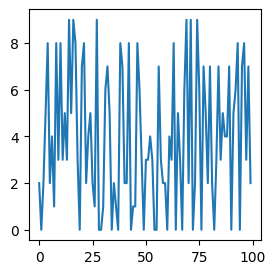

In [5]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

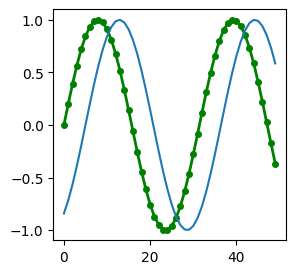

In [6]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
y = np.sin(x / 5 - 1)
plt.plot(x, y)
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

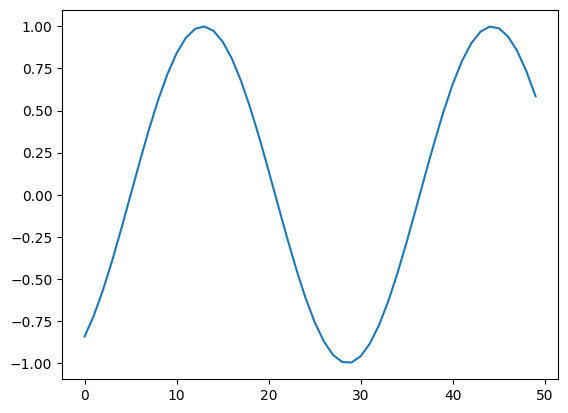

In [7]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


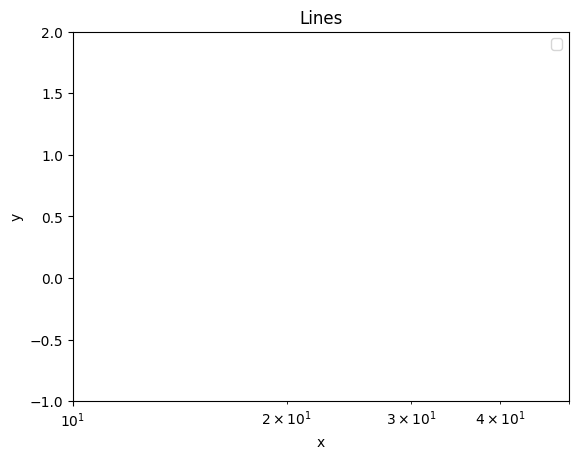

In [8]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

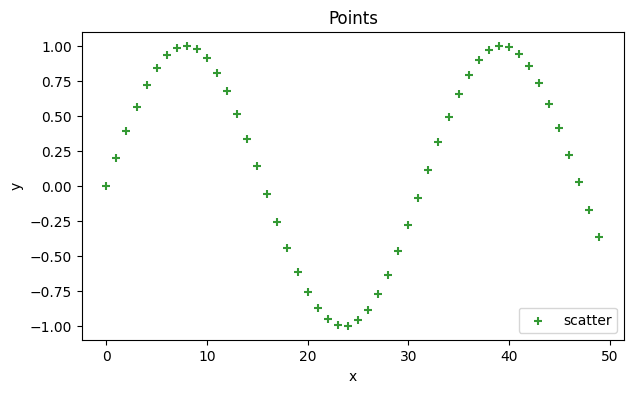

In [9]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

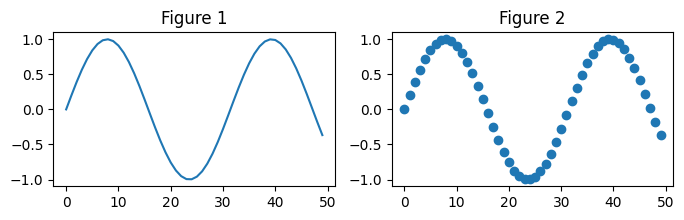

In [10]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

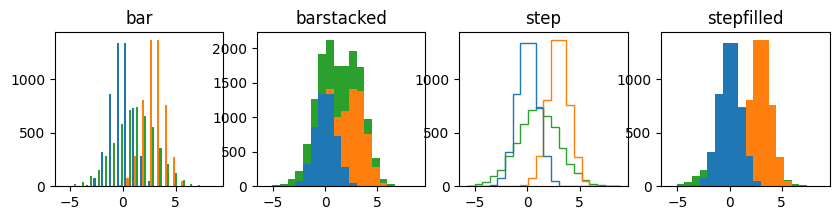

In [11]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

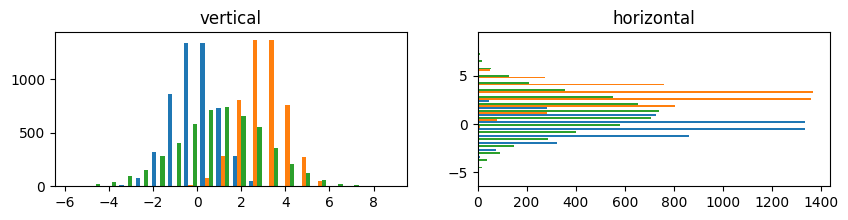

In [12]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [13]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.486155,0.974278,0.485470,0.893884,0.481555,0.574496,0.208465,0.491916,0.785597,0.579801
1,0.992921,0.463242,0.855654,0.324134,0.424257,0.419509,0.202665,0.380362,0.297292,0.434588
2,0.090767,0.576192,0.994387,0.810115,0.589922,0.041853,0.580082,0.346416,0.717568,0.430936
3,0.990130,0.994996,0.289417,0.368246,0.566203,0.466435,0.158673,0.027739,0.679539,0.516460
4,0.208594,0.800151,0.504285,0.772011,0.662843,0.836261,0.030362,0.079229,0.102960,0.844842


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

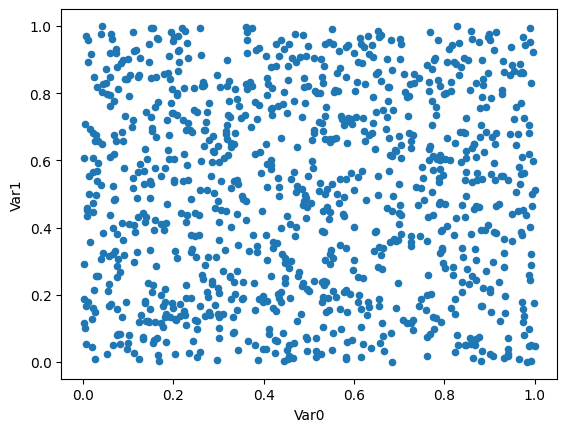

In [14]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

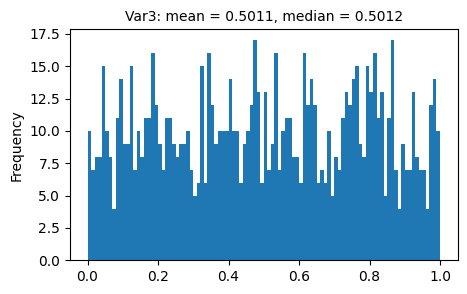

In [15]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

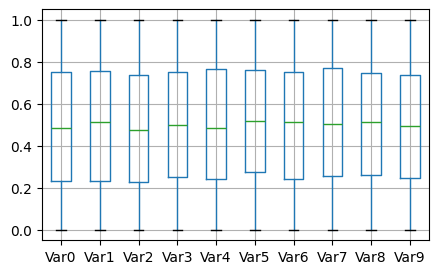

In [16]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

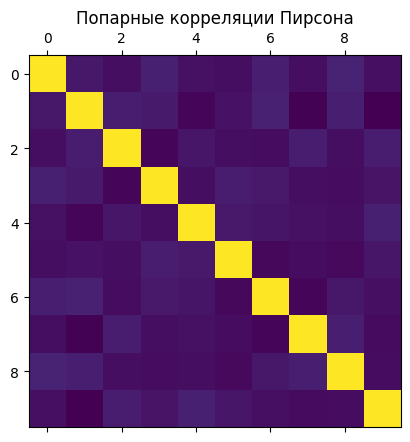

In [17]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

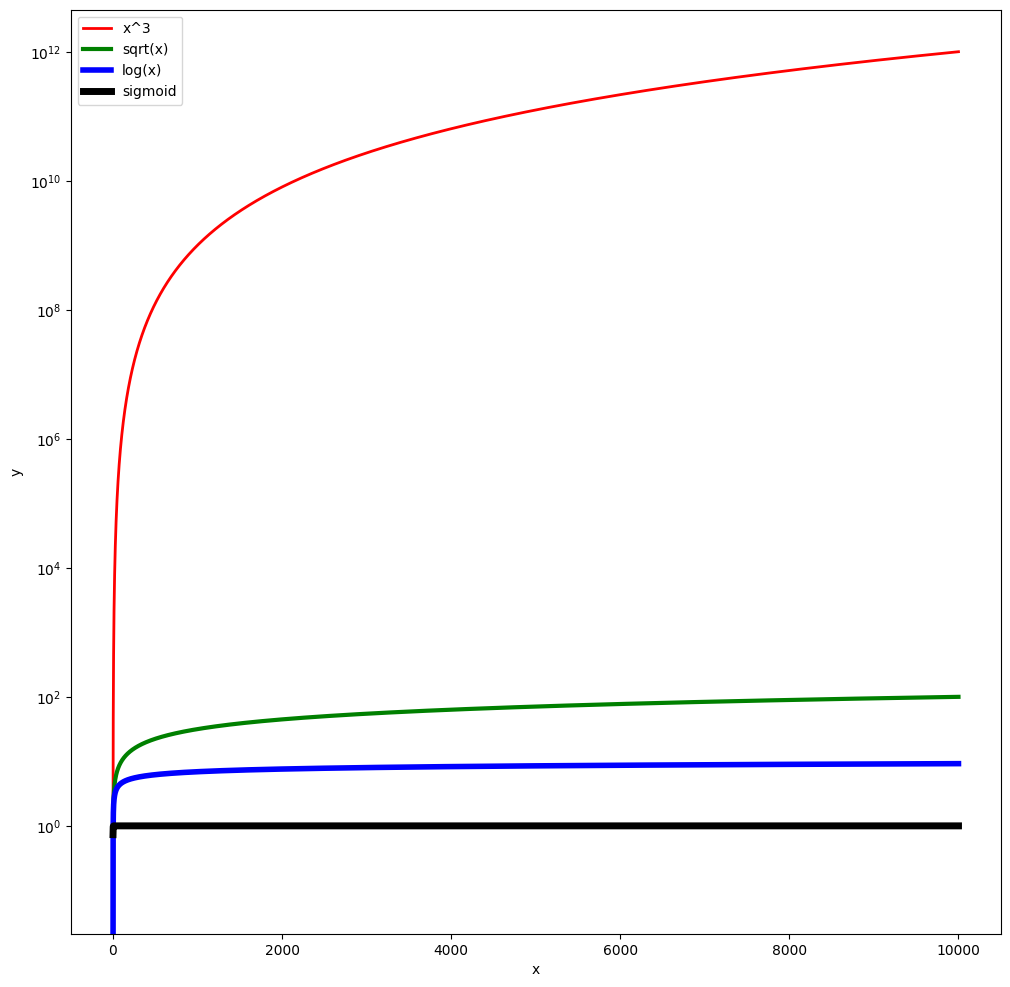

In [18]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))
plt.yscale('log')

x = np.arange(1, 10000, 0.1)

# Plot cubic parabola y = x^3
plt.plot(x, x**3, color='red', linewidth=2, label='x^3')

# Plot square root
plt.plot(x, np.sqrt(x), color='green', linewidth=3, label='sqrt(x)')

# Plot logarithm
plt.plot(x, np.log(x), color='blue', linewidth=4, label='log(x)')

# Plot sigmoid
plt.plot(x, 1/(1+np.exp(-x)), color='black', linewidth=5, label='sigmoid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [19]:
# напишите здесь ваш код

# Create dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Add 50 normally distributed columns
for i in range(50):
    mean = i
    std = i + 1
    col_name = 'col_{}'.format(i)
    df[col_name] = np.random.normal(mean, std, 1000)

df.loc[0:1000].describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025318,0.965243,1.992250,2.999408,3.946788,4.946176,6.191046,6.979646,8.398902,9.400766,...,40.528338,41.149025,40.589795,42.221233,43.213166,45.193012,48.025801,45.986486,48.864235,48.997959
std,1.022779,1.993247,2.892353,4.050600,5.055955,5.732497,7.389744,7.915626,9.382234,9.773368,...,41.198980,43.772165,44.045113,44.041066,45.353766,46.167891,46.731375,47.259944,49.103089,49.212193
min,-2.755054,-4.780540,-7.063762,-9.703040,-14.366708,-13.676682,-14.030224,-15.571994,-22.856045,-20.907205,...,-96.948576,-81.957718,-95.188243,-118.868898,-102.488428,-97.703547,-107.566067,-87.658481,-117.636285,-117.727812
25%,-0.618782,-0.422495,0.039876,0.164792,0.843300,1.544691,1.268005,1.351303,2.013983,2.938225,...,11.556226,11.191699,9.514213,12.872105,10.603558,14.592524,16.997921,13.741570,16.227874,15.750080
50%,0.017324,0.926290,1.881321,2.940961,3.969022,4.812307,5.914511,6.711538,8.766860,9.338036,...,40.430582,40.995357,39.595203,42.479545,42.501727,45.502779,49.242804,45.220953,46.390639,49.227411
75%,0.688784,2.373396,4.016106,5.686844,7.320663,8.665940,10.890724,12.093941,14.561496,15.927687,...,70.115029,70.886131,70.216367,70.504787,74.736949,76.514660,79.818576,79.146776,81.314092,78.774788
max,3.019929,7.463671,11.653807,16.394117,21.751795,21.716980,30.602432,32.942267,41.416832,44.568669,...,182.021715,169.501203,181.782379,183.848852,183.801830,207.786257,211.356058,175.728815,205.067689,199.005781


3. Определите медианы и стандартные отклонения для всех колонок.

In [20]:
# напишите здесь ваш код
result = None

columns = df.columns
indices = ['std', 'median']
result = pd.DataFrame(np.empty(shape=(len(indices), len(columns))), columns=columns, index=indices)

part = df.loc[:, columns]
result.loc['std'] = part.apply(np.std, axis=0)
result.loc['median'] = part.apply(np.median, axis=0)

result


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
std,1.022267,1.99225,2.890906,4.048575,5.053427,5.729630,7.386048,7.911667,9.377542,9.768480,...,41.178376,43.750273,44.023085,44.019040,45.331084,46.144802,46.708004,47.236308,49.078532,49.187581
median,0.017324,0.92629,1.881321,2.940961,3.969022,4.812307,5.914511,6.711538,8.766860,9.338036,...,40.430582,40.995357,39.595203,42.479545,42.501727,45.502779,49.242804,45.220953,46.390639,49.227411


4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

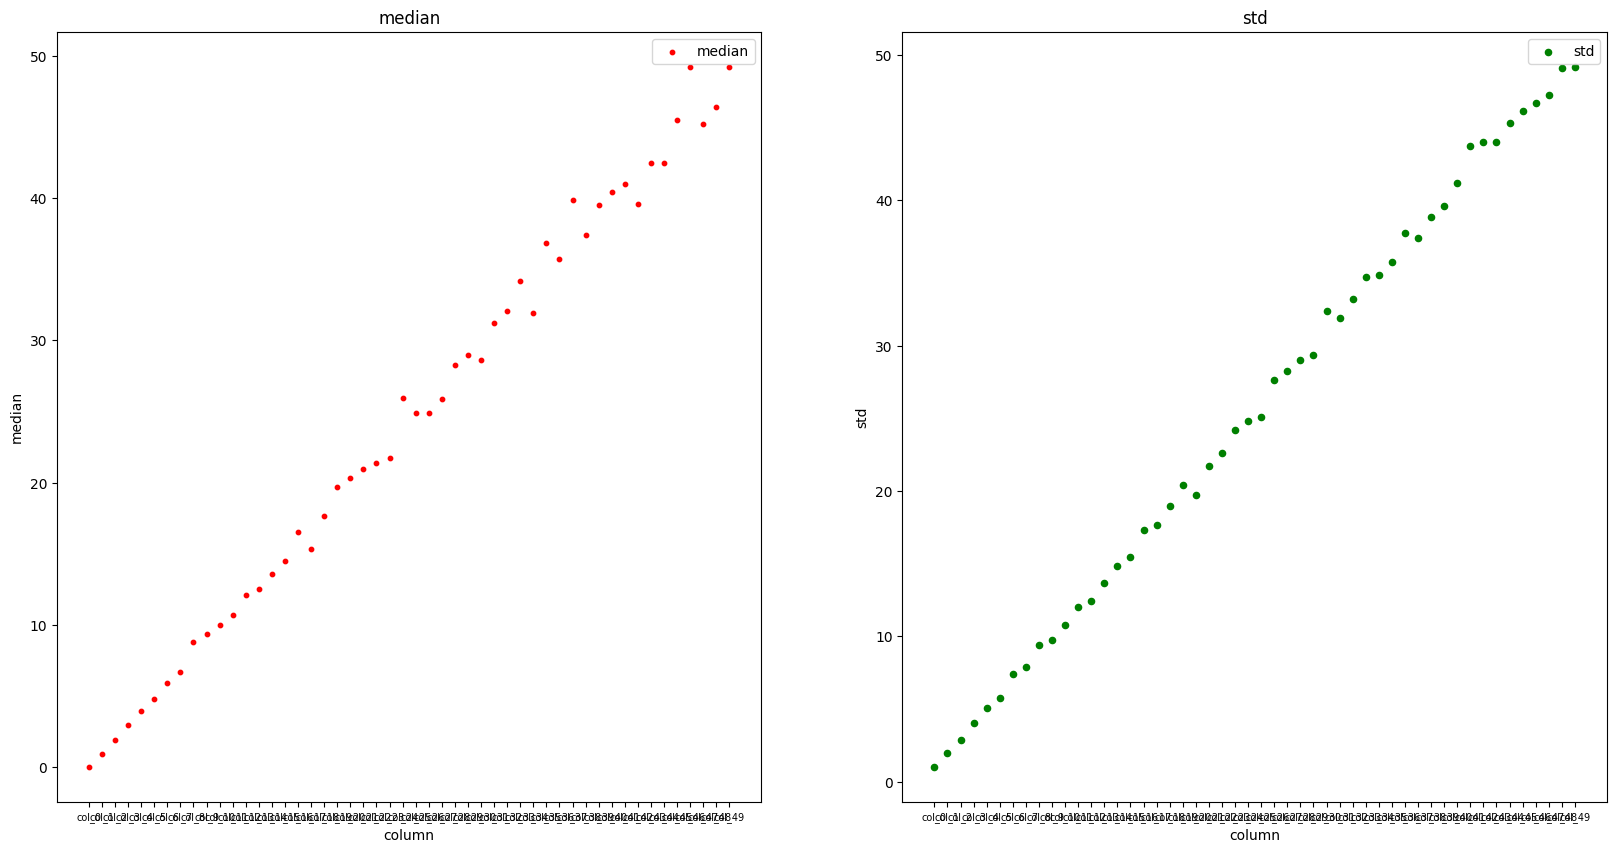

In [42]:
# напишите здесь ваш код
import matplotlib

matplotlib.rc('xtick', labelsize=7)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

plt.scatter(result.columns, result.loc['median'], color='red', s=10, label='median')

plt.title('median')
plt.xlabel('column')
plt.ylabel('median')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(result.columns, result.loc['std'], color='green', s=20, label='std')

plt.title('std')
plt.xlabel('column')
plt.ylabel('std')
plt.legend()

plt.show()

5. Постройте boxplot для любых 10 колонок.

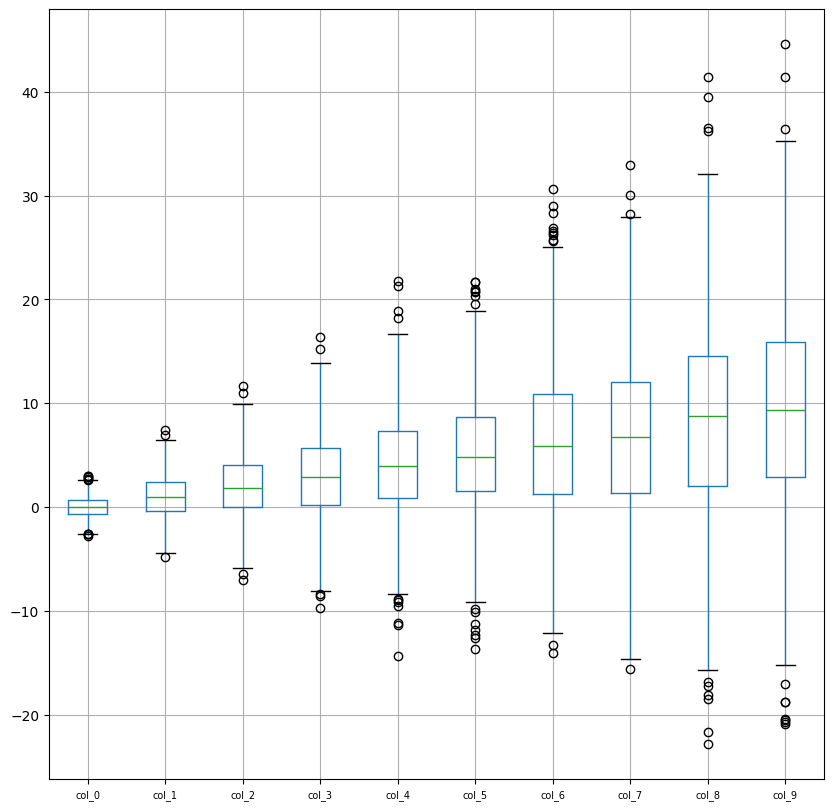

In [44]:
# напишите здесь ваш код
plt.figure(figsize=(10,10))
df.boxplot(column = list(df.columns[0:10]))
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [85]:
# напишите здесь ваш код

# Создаем таблицу с 1000 колонками и 1000 строками
data = np.random.uniform(0, 1, size=(1000, 1000))

# Преобразуем массив данных в DataFrame с помощью pandas
df = pd.DataFrame(data)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,0.494035,0.497028,0.506521,0.509933,0.509399,0.483593,0.504370,0.501685,0.501334,0.488123,...,0.519557,0.518318,0.488350,0.505950,0.510127,0.489983,0.496249,4.907791e-01,0.490574,0.502912
std,0.290692,0.285090,0.284108,0.289284,0.293185,0.283393,0.286966,0.292195,0.288013,0.291578,...,0.288498,0.290291,0.284839,0.280440,0.288509,0.287134,0.284729,2.941885e-01,0.293325,0.298814
min,0.000411,0.004433,0.000720,0.000037,0.000873,0.000431,0.000665,0.001713,0.001103,0.000686,...,0.000979,0.000322,0.001067,0.000008,0.000590,0.000143,0.000131,9.244813e-07,0.000281,0.000759
25%,0.236127,0.261592,0.254282,0.266341,0.251746,0.240755,0.262624,0.241778,0.265735,0.229970,...,0.274036,0.268624,0.229261,0.276750,0.272193,0.240550,0.250016,2.311435e-01,0.230696,0.237178
50%,0.500066,0.498831,0.510541,0.508114,0.511131,0.478739,0.498545,0.493550,0.492974,0.479217,...,0.541485,0.530734,0.491462,0.509844,0.517205,0.476576,0.493015,4.923721e-01,0.490045,0.515139
75%,0.744568,0.736703,0.760187,0.763191,0.774516,0.716932,0.746401,0.767346,0.745125,0.747089,...,0.769487,0.774634,0.721249,0.755617,0.751915,0.749312,0.740651,7.379186e-01,0.734404,0.766683
max,0.998531,0.998607,0.998361,0.999947,0.998707,0.995315,0.999885,0.997238,0.999068,0.997481,...,0.999816,0.999994,0.999338,0.998845,0.997899,0.995676,0.998445,9.999461e-01,0.999950,0.998806


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

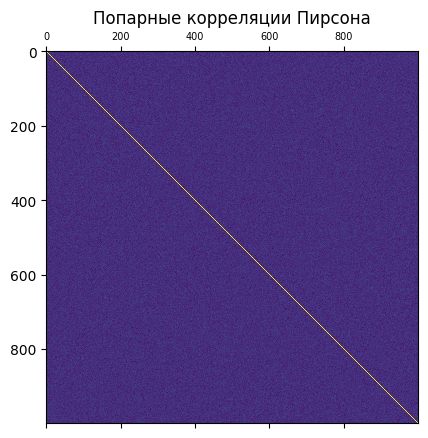

In [86]:
corr = df.corr()
plt.matshow(corr)
plt.title('Попарные корреляции Пирсона')
plt.show()

# continuous below

In [87]:
corr_no_center = corr

np.fill_diagonal(corr_no_center.values, None)

# continuous below

In [88]:
maximums = corr_no_center.idxmax()[0:4]
maximums

0      1
1    123
2    913
3     59
dtype: int64

In [91]:
# Рассчитываем попарную корреляцию Пирсона для всех колонок

# Находим 4 пары колонок с наибольшей попарной корреляцией
top_correlations = corr_no_center.unstack().sort_values(ascending=False)
top_pairs = top_correlations[:4]

# Выводим результат
print("4 пары колонок с наибольшей попарной корреляцией:")
for pair, correlation in top_pairs.items():
    col1, col2 = pair
    print(f"{col1} и {col2}: {correlation}")

4 пары колонок с наибольшей попарной корреляцией:
597 и 78: 0.14241810865119509
78 и 597: 0.14241810865119509
158 и 349: 0.14110620562913648
349 и 158: 0.14110620562913648


8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

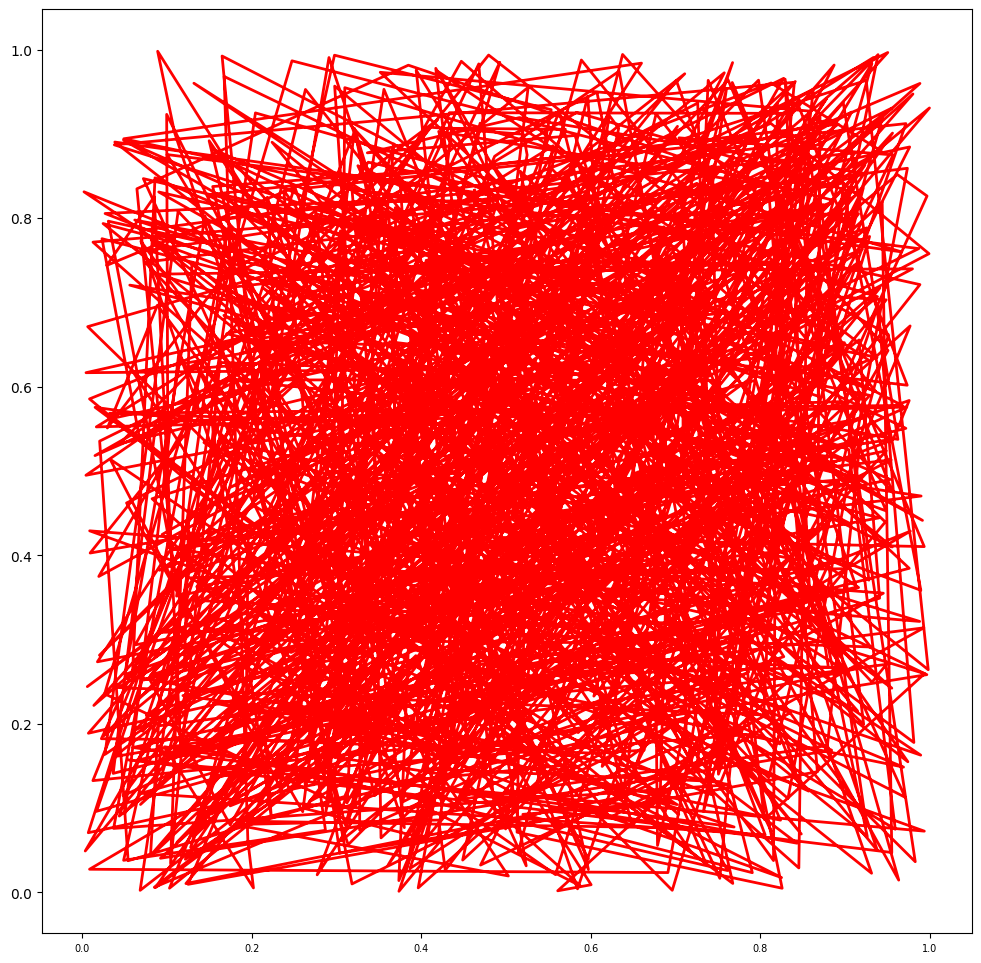

In [92]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))

maximums_items = list(maximums.items())

# plt.plot(df[maximums_items[0][0]], df[maximums_items[0][1]], color='red', linewidth=2)
plt.plot(df[349], df[158], color='red', linewidth=2)

plt.show()

9. Сделайте вывод о скоррелированности этих случайных величин.

In [26]:
# напишите здесь ваш код


## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")